In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15514 (delta 1), reused 7 (delta 1), pack-reused 15502
Receiving objects: 100% (15514/15514), 14.20 MiB | 2.64 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# make darknet (build)
!make

In [5]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-03-05 16:16:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.0MB/s    in 12s     

2023-03-05 16:17:01 (19.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [7]:
# define helper functions

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [12]:
#make sure to be in darknet directory before running detection
!pwd

/content/darknet


In [ ]:
# run darknet detection

!./darknet detect cfg/yolov3.cfg yolov3.weights /content/bike.jpeg

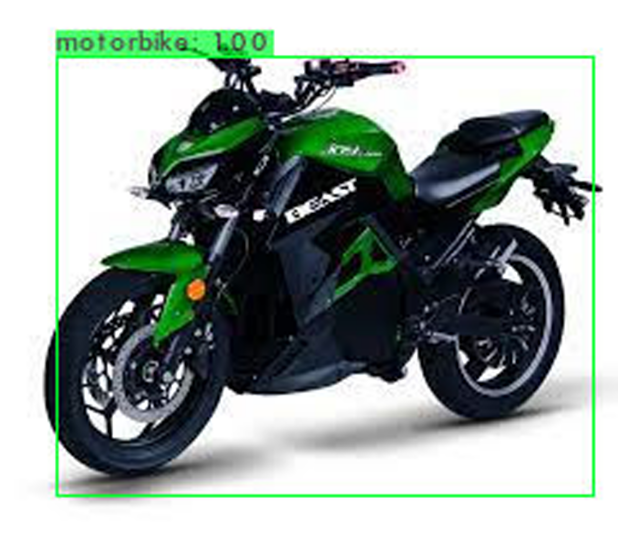

In [11]:
# show image using our helper function
imShow('predictions.jpg')

In [13]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [14]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive

!ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

In [ ]:
# LOCAL MACHINE DOWNLOAD

download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
!cp predictions.jpg /mydrive/images/detection1.jpg

cp: cannot stat 'predictions.jpg': No such file or directory


# Training a Custom YOLOv3 Object Detector

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   generate_train.py
*   train.txt file (test.txt is optional here as well)

# Step 1: Gathering and Labeling a Custom Dataset
create labelled Data using labelImg

In [ ]:
#pip install labelImg

# Step 2: Moving Your Custom Dataset Into Your colab



In [16]:
# copy the .zip file into the root directory of colab
!cp /content/gdrive/MyDrive/DL_class/obj.zip ../

In [17]:
# unzip the zip file and its contents should now be in /content/data/obj and then we can genrate train file 
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/car1.jpg       
  inflating: data/obj/car2.jpg       
  inflating: data/obj/car3.jpg       
  inflating: data/obj/car4.jpg       
  inflating: data/obj/car5.jpg       
  inflating: data/obj/car6.jpg       
  inflating: data/obj/car7.jpg       
  inflating: data/obj/car1.txt       
  inflating: data/obj/classes.txt    
  inflating: data/obj/car2.txt       
  inflating: data/obj/car3.txt       
  inflating: data/obj/car4.txt       
  inflating: data/obj/car5.txt       
  inflating: data/obj/car6.txt       
  inflating: data/obj/car7.txt       


In [18]:
!cp /content/gdrive/MyDrive/DL_class/obj.data  ./data

In [19]:
!cp /content/gdrive/MyDrive/DL_class/obj.names  ./data

In [26]:
!cp /content/gdrive/MyDrive/DL_class/yolov3_custom.cfg  ./data

# Step 3: Configuring Files for Training


In [ ]:
download('/content/darknet/cfg/yolov3.cfg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/DL_class/generate_train.py ./

In [21]:
!python generate_train.py

In [22]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

obj  obj.data  obj.names  train.txt


# Step 4: Download pre-trained weights for the convolutional layers.

In [23]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2023-03-05 16:24:58--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  21.0MB/s    in 8.2s    

2023-03-05 16:25:07 (18.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Your Custom Object Detector!

In [ ]:
!/content/darknet/darknet detector train /content/data/obj.data /content/data/yolov3_custom.cfg darknet53.conv.74 -dont_show

# Step 6: Run Your Custom Object Detector!

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/images/safari.jpg #-thresh 0.3
imShow('predictions.jpg')

In [ ]:
#End